In [17]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For advanced visualizations
import matplotlib.pyplot as plt  # For basic plotting
from scipy import stats  # For statistical analysis
from scipy.stats import norm # For Z-score and corresponding p-value
import scipy.stats as st  # For additional statistical tools
from statsmodels.stats import weightstats as stests  # For statistical tests

data = pd.read_csv('/content/drive/MyDrive/GloBox2/query_results.csv')
data.head()  # Display the first few rows to understand the data structure


,id,country,gender,group,join_date,device,spent_date,spent
0,1009971,USA,M,B,2023-02-02,A,NaN,0.00
1,1003383,USA,O,A,2023-01-25,A,NaN,0.00
2,1020093,ESP,F,B,2023-01-26,A,NaN,0.00
3,1012501,GBR,O,A,2023-01-28,A,2023-01-28,26.84
4,1010773,MEX,M,A,2023-01-28,I,NaN,0.00


In [18]:
data.info()  # Get an overview of data types and missing values
data.describe()  # Get statistical summaries for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49082 entries, 0 to 49081
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          49082 non-null  int64  
 1   country     48435 non-null  object 
 2   gender      42200 non-null  object 
 3   group       49082 non-null  object 
 4   join_date   49082 non-null  object 
 5   device      48787 non-null  object 
 6   spent_date  2233 non-null   object 
 7   spent       49082 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.0+ MB


,id,spent
count,4.908200e+04,49082.000000
mean,1.025002e+06,3.373156
std,1.443515e+04,25.079623
min,1.000000e+06,0.000000
25%,1.012508e+06,0.000000
50%,1.024994e+06,0.000000
75%,1.037505e+06,0.000000
max,1.049999e+06,1659.400000


In [19]:
# Assuming 'spent' can have missing values, fill with 0
data['spent'] = data['spent'].fillna(0)


In [20]:
# Group by 'group' and calculate total and average spent
group_spent = data.groupby('group')['spent'].agg(['sum', 'mean']).reset_index()
group_spent


,group,sum,mean
0,A,82145.903065,3.366359
1,B,83415.326869,3.379875


In [21]:
# Total number of users
total_users = data['id'].nunique()

# Total number of users in group A
users_in_group_A = data[data['group'] == 'A']['id'].nunique()

# Total number of users in group B
users_in_group_B = data[data['group'] == 'B']['id'].nunique()

print(f'Total users: {total_users}, Total users in Group A: {users_in_group_A}, Total users in Group B {users_in_group_B}')

Total users: 48943, Total users in Group A: 24343, Total users in Group B 24600


In [22]:
# Calculate overall conversion rate
total_conversions = data[data['spent'] > 0]['id'].nunique()
overall_conversion_rate = (total_conversions / total_users)*100

# Calculate conversion rate for Group A
group_a_conversions = data[(data['group'] == 'A') & (data['spent'] > 0)]['id'].nunique()
conversion_rate_group_a = (group_a_conversions / users_in_group_A)*100

# Calculate conversion rate for Group B
group_b_conversions = data[(data['group'] == 'B') & (data['spent'] > 0)]['id'].nunique()
conversion_rate_group_b = (group_b_conversions / users_in_group_B)*100

print(f'Conversion Rate: {overall_conversion_rate}%, Group A CR: {conversion_rate_group_a}%, Group B CR {conversion_rate_group_b}%')

Conversion Rate: 4.2784463559651025%, Group A CR: 3.9230990428459926%, Group B CR 4.630081300813008%


<ipython-input-36-2d3d86d0afba>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='sum', data=group_spent, palette=palette)


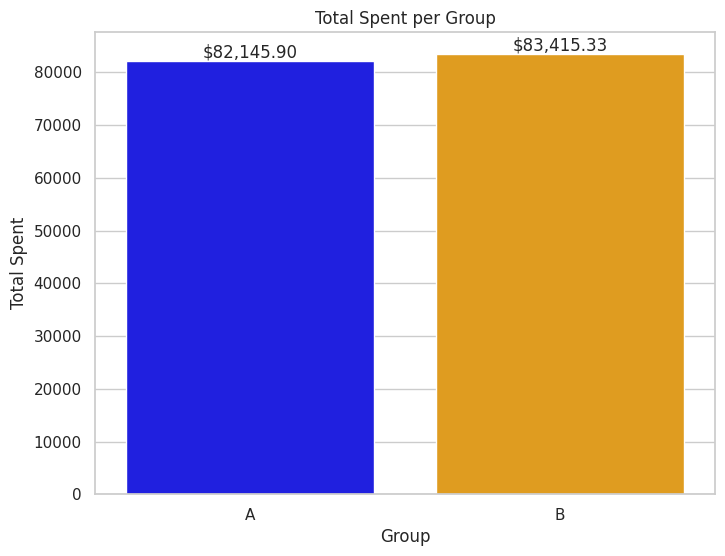

<ipython-input-36-2d3d86d0afba>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='mean', data=group_spent, palette=palette)


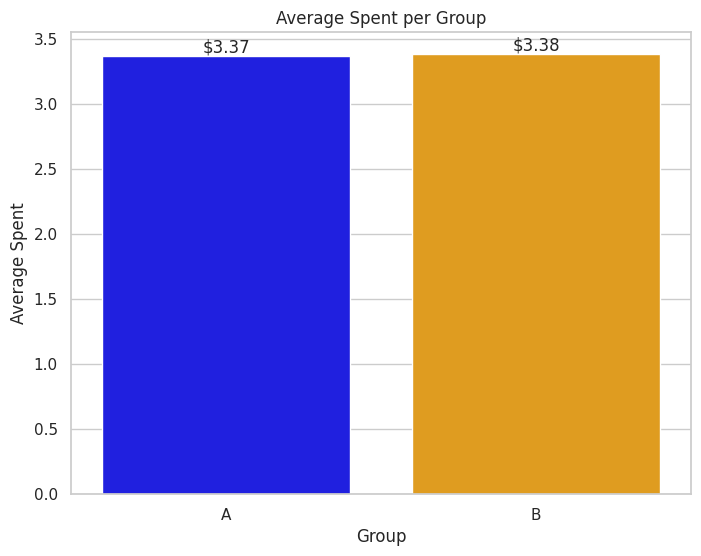

In [36]:
# Set a clean and informative style for plots
sns.set(style="whitegrid")

# Custom palette
palette = {"A": "blue", "B": "orange"}

# Total spent per group
plt.figure(figsize=(8, 6))
sns.barplot(x='group', y='sum', data=group_spent, palette=palette)
plt.title('Total Spent per Group')
plt.xlabel('Group')
plt.ylabel('Total Spent')

# Adding value labels on top of the bars
for index, value in enumerate(group_spent['sum']):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom')

plt.show()

# Average spent per group
plt.figure(figsize=(8, 6))
sns.barplot(x='group', y='mean', data=group_spent, palette=palette)
plt.title('Average Spent per Group')
plt.xlabel('Group')
plt.ylabel('Average Spent')

# Adding value labels on top of the bars
for index, value in enumerate(group_spent['mean']):
    plt.text(index, value, f'${value:.2f}', ha='center', va='bottom')

plt.show()


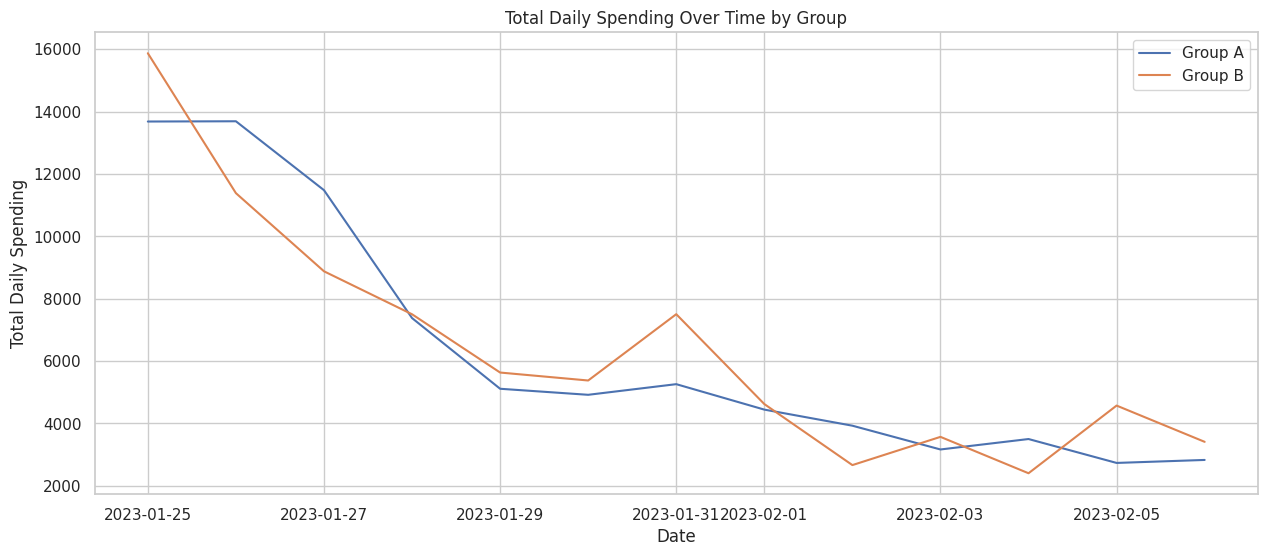

In [31]:
# Makeing date into a datetime
data['spent_date'] = pd.to_datetime(data['spent_date'])
data.sort_values(by='spent_date', inplace=True)

# Grouping data by date and group, then summing spending
daily_spending = data.groupby(['spent_date', 'group'])['spent'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 6))
for group in ['A', 'B']:
    group_data = daily_spending[daily_spending['group'] == group]
    plt.plot(group_data['spent_date'], group_data['spent'], label=f'Group {group}')

plt.title('Total Daily Spending Over Time by Group')
plt.xlabel('Date')
plt.ylabel('Total Daily Spending')
plt.legend()
plt.show()


- Initial Drop: Both groups started with a certain level of spending on the first day, with Group A beginning slightly higher than Group B. Immediately on the following day, there's a sharp drop in spending for both groups, which is typical as initial interest or activity may wane after a new feature's launch or the start of a campaign.
- Spending Fluctuations: Over the subsequent days, there are fluctuations in the spending patterns of both groups. Such fluctuations could be influenced by various factors including weekday versus weekend behavior, marketing activities, or user engagement with the website.
- Group B Peak: Around 2023-01-31, Group B shows a significant peak in spending that is not mirrored in Group A. This could suggest a particular response to the banner by Group B on that day, or it could be the result of an external factor not controlled for in the test.
- Converging Trends: After the peak, spending in Group B drops back down and the trends for both groups begin to converge, suggesting that the initial impact observed may be leveling off.
- Overall Comparison: Throughout the period, Group B generally spends more than Group A, except on the first and last days shown. This could suggest that the presence of the banner in Group B had a positive impact on spending, though not consistently day-to-day.

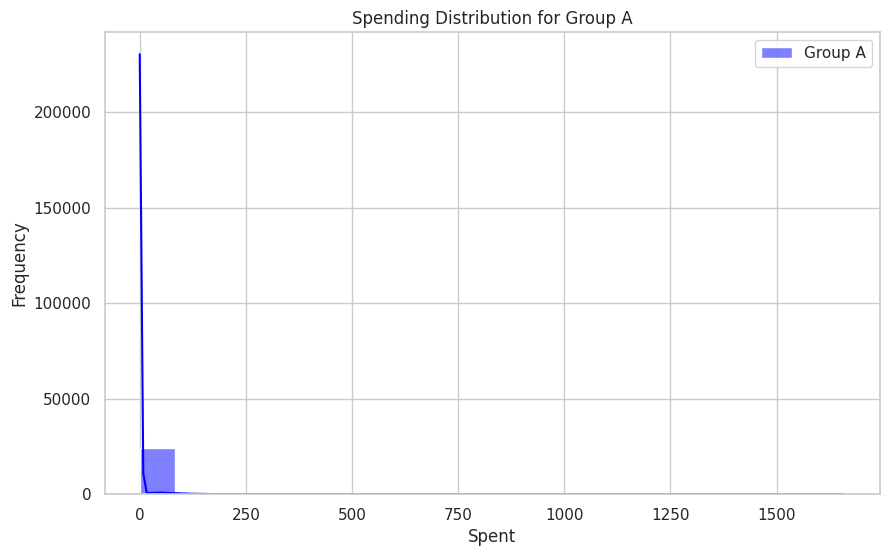

In [32]:
# Histogram for spending distribution for Group A
plt.figure(figsize=(10, 6))
sns.histplot(data[data['group'] == 'A']['spent'], bins=20, kde=True, color='blue', label='Group A')
plt.title('Spending Distribution for Group A')
plt.xlabel('Spent')
plt.ylabel('Frequency')
plt.legend()
plt.show()


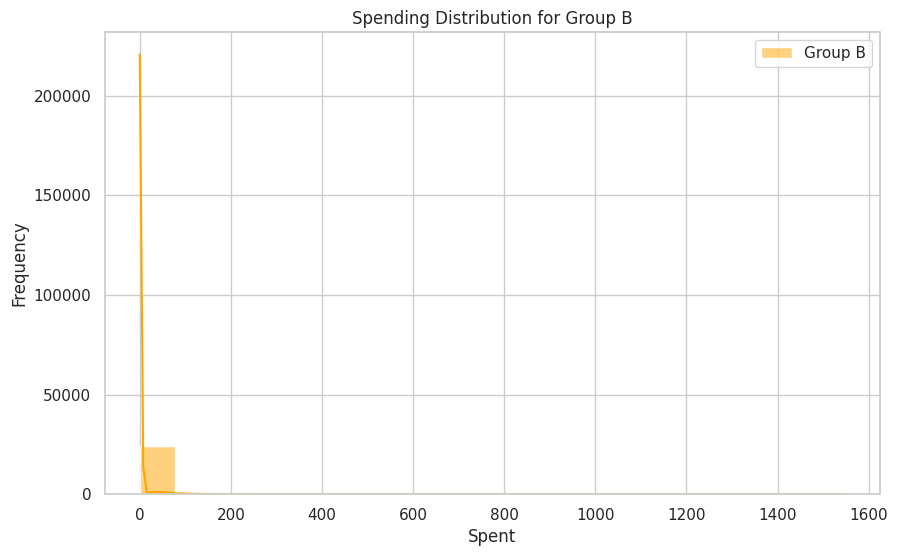

In [33]:
# Histogram for spending distribution for Group B
plt.figure(figsize=(10, 6))
sns.histplot(data[data['group'] == 'B']['spent'], bins=20, kde=True, color='orange', label='Group B')
plt.title('Spending Distribution for Group B')
plt.xlabel('Spent')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- Skewness: Both histograms are heavily right-skewed, meaning most of the spending data is clustered near the lower end of the spending scale, with a few users spending much more. This is a common pattern in spending behavior where a small number of users account for a high proportion of the spending.
- Low-Spend Majority: The tall bar at the zero-spent end in both histograms suggests that a large number of users did not spend at all, which could be non-converters or window shoppers.
- Outliers and High Spenders: The presence of bars further to the right indicates that there are indeed some users who spend significantly more than the average user. These could be outliers or simply high-value customers.
- Frequency and Scale: The y-axis (frequency) has very high values which suggest that the dataset is quite large. This can be good for statistical analysis as it provides a robust sample size.

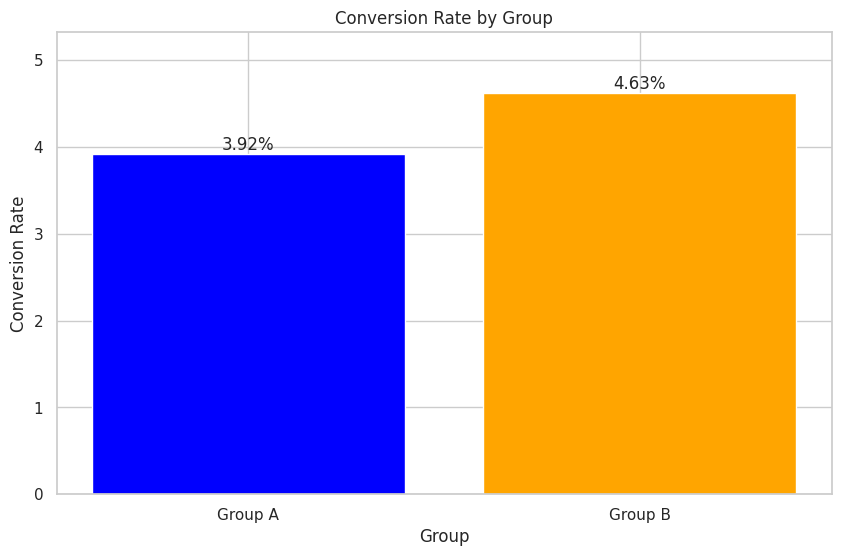

In [35]:
# Now we'll create a bar chart with these values.
group_labels = ['Group A', 'Group B']
conversion_rates = [conversion_rate_group_a, conversion_rate_group_b]

plt.figure(figsize=(10, 6))
plt.bar(group_labels, conversion_rates, color=['blue', 'orange'])
plt.title('Conversion Rate by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(conversion_rates) * 1.15)  # Set y-limit to be 15% higher than the max value for aesthetic spacing

# Adding value labels on top of the bars
for i, rate in enumerate([conversion_rate_group_a, conversion_rate_group_b]):
    plt.text(i, rate, f'{rate:.2f}%', ha='center', va='bottom')  # Formats the label as a percentage

plt.show()

- Higher Conversion Rate in Group B: Group B, which was exposed to the banner, shows a higher conversion rate of 4.63% compared to Group A’s 3.92%. This suggests that the banner could be positively influencing user behavior, leading to a higher proportion of users making a purchase.
- If the difference in conversion rates is statistically significant, this would support the conclusion that the banner had a real effect on user behavior.
- Even a small increase in the conversion rate can have a significant impact on revenue, especially when scaled up over many transactions. The fact that Group B has a higher rate could justify broader implementation of the banner or similar marketing strategies.

#Statistical Testing spent means

- Null Hypothesis(H0): There is no difference in the mean spending between Group A and Group B.

- Alternative Hypothesis (H1): There is a difference in the mean spending between Group A and Group B.

In [24]:
# Example: T-test for comparing means between two groups
group_a = data[data['group'] == 'A']['spent']
group_b = data[data['group'] == 'B']['spent']
t_stat, p_val = stats.ttest_ind(group_a, group_b)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: -0.05969641336991618, P-value: 0.9523976714075966


In [25]:
# Interpret the T-test results:
# We assess the p-value to determine the statistical significance of the observed differences in spending between groups A and B.
# A p-value below 0.05 indicates a statistically significant difference, meaning the observed difference in spending is unlikely due to chance.
# This result will guide our decision on whether the changes introduced to Group B have a meaningful impact on spending behavior compared to Group A.

if p_val < 0.05:
    print("The analysis indicates a statistically significant difference in spending between Group A and Group B, suggesting the banner's impact on user spending is meaningful.")
else:
    print("The analysis does not indicate a statistically significant difference in spending between Group A and Group B, suggesting the banner's impact on user spending might not be substantial.")



The analysis does not indicate a statistically significant difference in spending between Group A and Group B, suggesting the banner's impact on user spending might not be substantial.


Since the analysis does not indicate a statistically significant difference in spending between Group A and Group B, suggesting the banner's impact on user spending might not be substantial, we fail to reject the Null Hypothesis.

#Statistical Testing Conversion Rate

- Null Hypothesis (H0): There is no difference in conversion rates between Group A and Group B.

- Alternative Hypothesis (H1): There is a difference in conversion rates between Group A and Group B.

In [27]:
# This test compares the proportion of conversion between the two groups to see if there is a significant difference.
n1 = 24343
n2 = 24600
x1 = n1 * 0.03923099042845993
x2 = n2 * 0.04630081300813008

# Conversion rates
p1 = x1 / n1
p2 = x2 / n2

# Pooled proportion
p = (x1 + x2) / (n1 + n2)

# Standard error
SE = (p * (1 - p) * (1/n1 + 1/n2)) ** 0.5

# Z-score
Z = (p1 - p2) / SE

# P-value
p_value = 2 * norm.cdf(-abs(Z))  # Two-tailed test

print(f'Z-score: {Z}, p-Value: {p_value}')

Z-score: -3.864291770414927, p-Value: 0.00011141198532947085


- Z-score: The negative Z-score indicates that the conversion rate for Group A is less than the conversion rate for Group B. The magnitude of the Z-score shows how many standard deviations the observed difference is away from the null hypothesis (no difference).
- P-value: The p-value is significantly smaller than the common alpha level of 0.05 (even smaller than 0.01), indicating that the observed difference in conversion rates between Group A and Group B is very unlikely to have occurred by chance.

With such a low p-value, we can reject the null hypothesis that there is no difference in conversion rates between the two groups. This suggests that the presence of the banner in Group B had a statistically significant positive effect on conversions compared to Group A.

